In [21]:
import vk
import random
import argparse
import pylab as plt
import networkx as nx
from tqdm import tqdm
from networkx.drawing.nx_agraph import graphviz_layout
%matplotlib inline

In [ ]:
ID = 1
VK_API_VERSION = 5.73

In [5]:
session = vk.Session()
vk_api = vk.API(session, timeout=120)

In [6]:
def get_name(idx):
    d = vk_api.users.get(user_id=idx, v=VK_API_VERSION)
    f_name = d[0]['first_name']
    l_name = d[0]['last_name']
    return '\n'.join([f_name, l_name])

def is_deleted(idx):
    d = vk_api.users.get(user_id=idx, v=VK_API_VERSION)
    if 'deactivated' in d[0]:
        return True
    else:
        return False

In [24]:
friends = vk_api.friends.get(user_id=ID, v=VK_API_VERSION)['items']

graph = {}
for user in tqdm(friends):
    if not is_deleted(user):
        user_friends = vk_api.friends.get(user_id=user, v=VK_API_VERSION)['items']
        user_friends_common = set.intersection(
            set(friends),
            set(user_friends)
        )
        graph[user] = list(user_friends_common)

G = nx.Graph(graph)
nodes = G.nodes()
mapping = {node: get_name(node) for node in nodes}
H = nx.relabel_nodes(G, mapping)

100%|██████████| 60/60 [00:24<00:00,  2.47it/s]


(-260.0951464603304, 295.4251464603303, -260.1047695453722, 248.10476954537228)

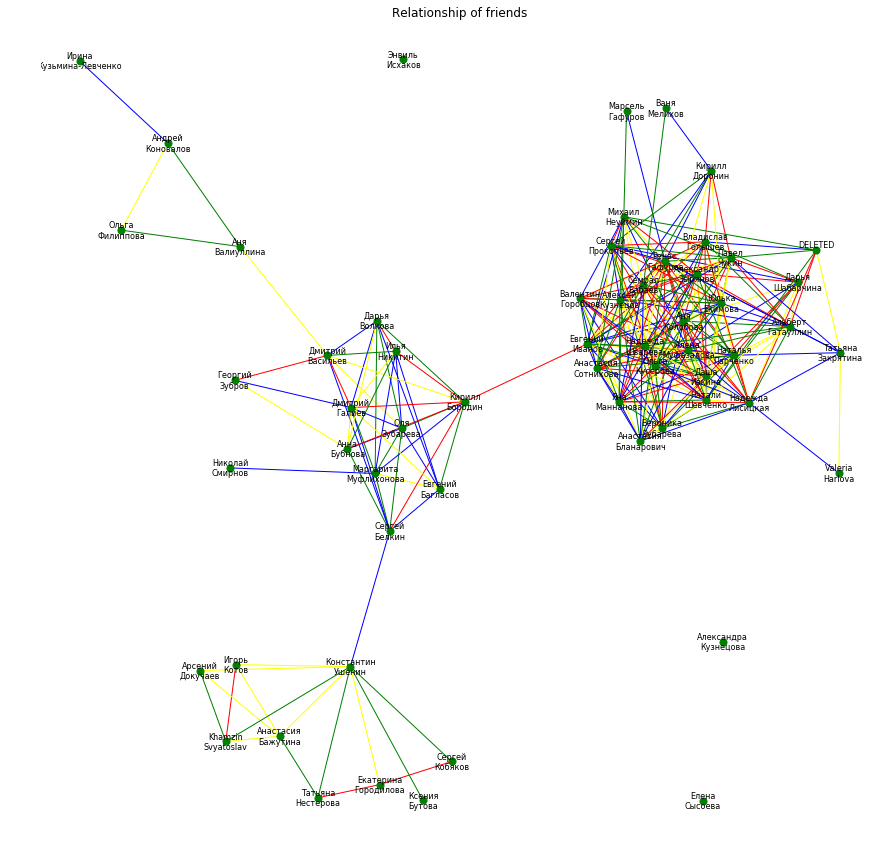

In [27]:
colors = ['red', 'yellow', 'blue', 'green']
edges_colors = [random.choice(colors) for e in H.edges()]

plt.figure(figsize=(15,15))
nx.draw_networkx(
    H,
    pos=graphviz_layout(H),
    edge_color=edges_colors, 
    node_size=50, 
    font_size=8,
    node_color='green'
)
plt.title('Relationship of friends')
plt.axis('off')